### Problems with Deep Neural Nets:
1. Vanishing gradients and exploding gradients problem makes the lower layers very hard to train.
2. Large networks makes the training extremely slow.
3. There will be large number of hyper parameters to tune and these would severly risk overfitting the training set.

### Vanishing/Exploding Gradients Problems
1. The backpropagation algorithm works by going from the output layer to the input layer, propagating the error gradient on the way.
2. Once the algorithm has computed the gradient of the cost function with regards to each parameter in the network, it uses these gradients to update each parameter with a Gradient Descent step.
3. Sometimes, gradients often get smaller and smaller as the algorithm progresses down to the lower layers. As a result, the Gradient Descent update leaves the lower level layers connection weights virtually unchanged, and training never converges to a good solution. This is called *Vanishing Gradients problem*.
4. Sometimes, the opposite can happen: the gradients can grow bigger and bigger, so many layers get insanely large weight updates and the algorithm diverges. This is calle *Exploding Gradients problem*.
5. Generally, DNN suffer from unstable gradients; different layers may learn at widely different speeds.

### Reasons for this behavior:
1. Usage of logistic sigmoid activation function.
2. Weight initilization techniques such as random initilization using a mean of 0 and SD of 1.
3. Because of the combination of the above two reasons, the variance of the outputs of each layer is much greater than the variance of the inputs. Going forward, the variance keeps increasing after each layer until the activation fucntion saturates at the top layers. 

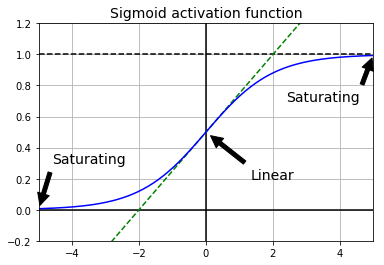

In [19]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 200)

def logit(z):
    return(1/(1+(np.exp(-z))))

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b')
plt.axis([-5, 5, -0.2, 1.2])
plt.grid()
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")
plt.title("Sigmoid activation function", fontsize=14)
plt.show()

At higher positive and negative inputs, the function saturates at 0 or 1 and the gradient is 0 there. Thus when the backpropagation kicks in, there is virutually no gradient to propogate back through the network, and what little gradient exists keeps getting diluted as backpropagation progresses down through the top layers, so there is really nothing left for the lower layers.
### Hyperbolic Tanget function

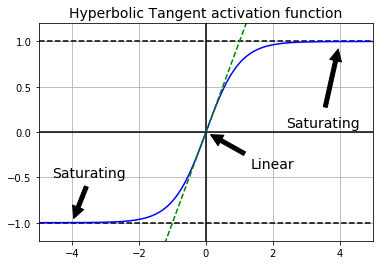

In [107]:
def tan_h(z):
    return np.tanh(z)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [1.2, -1.2], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot(z, tan_h(z), 'b')
plt.plot([-5, 5], [-5, 5], 'g--')
plt.axis([-5, 5, -1.2, 1.2])
plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, .05), xy=(4, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5,-0.5), xy=(-4, -1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, -0.4), xy=(0, 0), arrowprops=props, fontsize=14, ha="center")
plt.title("Hyperbolic Tangent activation function", fontsize=14)
plt.show()

### Xavier and He Initialization:

1. To avoid vanishing/exploding gradient problems, Glorot and Bengio proposed that we need the variance of the outputs of each layer to be equal variance before and after flowing through a layer in the reverse direction.
2. Xavier initilization considers both the number of input and output connections whose layer weights are being initialized.
3. He initilization considers only the number of input connections whose layer weights are being initialized.

### ReLU Activation Function:
1. ReLU outputs its input value if it is more than zero and outputs zero for all other values.
2. It doesn't saturate for positive values.
3. It's gradient is faster to compute.

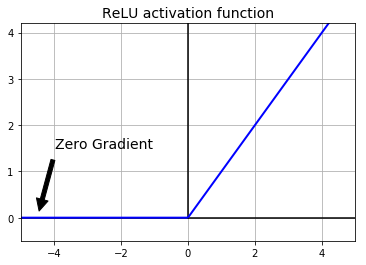

In [50]:
def relu(z):
    return np.maximum(0,z)

plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[0,5], "k-")
plt.plot(z, relu(z), "b-", linewidth=2)
plt.annotate('Zero Gradient', xytext=(-2.5, 1.5), xy=(-4.5, 0), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

### Problems with ReLU:
1. It suffers from a problem known as the dying ReLu: during training some nerons effectively die, meaning our network's neurons are dead, especially if you used a large learning rate.
2. During training, if a neuron's weights get updated such that the weighted sum of the neuron's inputs is negative, it will start outputting 0. When this happens, the neuron is unlikely to come back to life since the gradient of the ReLU function is 0 when its input is negative.

### Leaky ReLU:

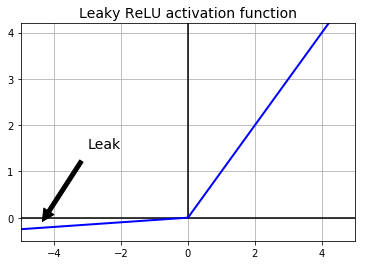

In [51]:
def leaky_relu(z, alpha):
    return np.maximum(alpha*z,z)

plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[0,5], "k-")
plt.plot(z, leaky_relu(z,0.05), "b-", linewidth=2)
plt.annotate('Leak', xytext=(-2.5, 1.5), xy=(-4.5, -0.25), arrowprops=props, fontsize=14, ha="center")
plt.grid(True)
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])
plt.show()

1. Alpha parameter calculates how much the leak should be.
2. That small leak will make sure that the function never dies; they can go into a logn coma, but they have a chance to eventually wake up. Performs better than normal ReLU in most situations.
3. *Parametric Leaky ReLU* where alpha is authorized to be learned during training (it becomes a parameter that can be modified by backpropagation instead of being a hyperparameter). Perfroms better with large image datasets but overfits on smaller datasets.

### Exponential Linear Unit (ELU):

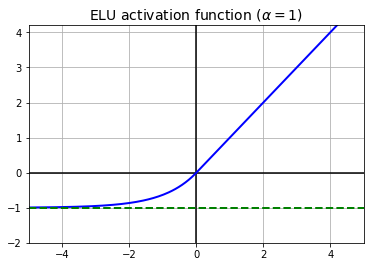

In [70]:
def elu(z, alpha):
    return np.where(z < 0, alpha*(np.exp(z)-1), z)

plt.plot([-5,5],[0,0],"k-")
plt.plot([0,0],[-2,5], "k-")
plt.plot(z, elu(z,1), "b-", linewidth=2)
plt.plot([-5,5],[-1,-1], "g--", linewidth=2)
plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2, 4.2])
plt.show()

### Advantages of ELU:
1. Vanishing gradient problem is alleviated as for the z<0, the average output is closer to zero. The hyper parameter alpha defines the value that the ELU function approaches when z is a large negative number.
2. For z<0, the gradient is not zero, which avoids dying units issues.
3. The function is smooth everywhere including around z=0, which speed up Gradient Descent, since it does not bounce as much left and right of z=0.
### Drawbacks of ELU:
1. Slower due to compute when compared to other ReLU variants.
2. It converges faster than other functions during training but again during testing ELU network will be slower than a ReLU network.